# Analyse der API-Daten von SteamSpy.com

In [1]:
# Import
import os
import json
import pyprind
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Path to the data
path = '/home/jm/Desktop/Data/SteamSpy_Data/API/'

data = []

files = [path+file for file in os.listdir(path)]
pbar = pyprind.ProgPercent(len(files))
# Iterate over each file in the folder
for file in files:
    # Read the json
    df = pd.read_json(file).T
    # Add the Date-Column to the DataFrame
    df['Date'] = file.rsplit('/', 1)[-1].split('_')[0]
    # Save the DataFrame
    data.append(df)
    pbar.update()
df = pd.concat(data)
# Parse the Date-Column and set an index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

for col in df.columns:
    df[col] = df[col].astype(np.float, errors='ignore')

[  8 %] Time elapsed: 00:02:04 | ETA: 00:22:15

In [3]:
df.shape

(658790, 21)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 658790 entries, 2017-11-06 to 2017-11-07
Data columns (total 21 columns):
appid                       658790 non-null float64
average_2weeks              658790 non-null float64
average_forever             658790 non-null float64
ccu                         441207 non-null float64
developer                   658790 non-null object
median_2weeks               658790 non-null float64
median_forever              658790 non-null float64
name                        658790 non-null object
negative                    280670 non-null float64
owners                      658790 non-null float64
owners_variance             658790 non-null float64
players_2weeks              658790 non-null float64
players_2weeks_variance     658790 non-null float64
players_forever             658790 non-null float64
players_forever_variance    658790 non-null float64
positive                    280670 non-null float64
price                       649321 non-null

In [15]:
df.head()

,appid,average_2weeks,average_forever,ccu,developer,median_2weeks,median_forever,name,negative,owners,...,players_2weeks,players_2weeks_variance,players_forever,players_forever_variance,positive,price,publisher,score_rank,tags,userscore
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-06,10.0,629.0,11240.0,20949.0,Valve,71.0,418.0,Counter-Strike,NaN,13963364.0,...,342203.0,17349.0,9835523.0,92085.0,NaN,999.0,Valve,97,"{'Score Attack': 181, 'Strategy': 301, 'e-spor...",NaN
2017-11-06,100.0,118.0,221.0,87.0,Valve,12.0,32.0,Counter-Strike: Condition Zero,NaN,11359444.0,...,13348.0,3427.0,2064035.0,42532.0,NaN,999.0,Valve,71,"{'Online Co-Op': 38, 'Strategy': 78, 'Simulati...",NaN
2017-11-06,10000.0,0.0,655.0,2.0,,0.0,252.0,Enemy Territory: Quake Wars,NaN,26005.0,...,0.0,0.0,13808.0,3486.0,NaN,0.0,,,[],NaN
2017-11-06,1002.0,0.0,113.0,0.0,Mark Healey,0.0,16.0,Rag Doll Kung Fu,NaN,33829.0,...,0.0,0.0,11506.0,3182.0,NaN,999.0,Mark Healey,25,"{'Indie': 28, 'Multiplayer': 5, 'Fighting': 6}",NaN
2017-11-06,100400.0,0.0,552.0,0.0,Nevercenter Ltd. Co.,0.0,180.0,Silo 2,NaN,4372.0,...,0.0,0.0,3222.0,1684.0,NaN,9999.0,Nevercenter Ltd. Co.,37,"{'Animation & Modeling': 24, 'Software': 11}",NaN


In [24]:
work_df = df.groupby([pd.TimeGrouper('d'), 'publisher']).agg('mean').drop(['appid'], axis=1)
work_df.head()

average_2weeks  average_forever         ccu  \
Date       publisher                                                         
2017-11-01                         125.329971       1071.17147   15.670029   
                                   391.250000        686.50000  116.000000   
             Milestone S.r.l.       51.000000        245.00000    0.000000   
            AYE Technology           0.000000          7.00000    0.000000   
            Big Fish Games           0.000000         18.00000    0.000000   

                               median_2weeks  median_forever  negative  \
Date       publisher                                                     
2017-11-01                         119.25072      761.727666       NaN   
                                    47.25000      110.500000       NaN   
             Milestone S.r.l.       51.00000      308.000000       NaN   
            AYE Technology           0.00000        7.000000       NaN   
            Big Fish Games           0.00000       18.000000       NaN   

                                      owners  owners_variance  players_2weeks  \
Date       publisher                                                            
2017-11-01                      98984.230548      5585.229107      922.446686   
                               271346.250000     11194.750000     4102.500000   
             Milestone S.r.l.    7021.000000      2506.000000      711.000000   
            AYE Technology       5616.000000      2242.000000        0.000000   
            Big Fish Games       1170.000000      1023.000000        0.000000   

                               players_2weeks_variance  players_forever  \
Date       publisher                                                      
2017-11-01                                  374.842939     43812.559078   
                                           1411.250000    213367.750000   
             Milestone S.r.l.               984.000000      5148.000000   
            AYE Technology                    0.000000       716.000000   
            Big Fish Games                    0.000000       700.000000   

                               players_forever_variance  positive       price  \
Date       publisher                                                            
2017-11-01                                  3460.919308       NaN  158.436275   
                                            9976.500000       NaN  324.250000   
             Milestone S.r.l.               2146.000000       NaN  999.000000   
            AYE Technology                  1403.000000       NaN  399.000000   
            Big Fish Games                   968.000000       NaN  599.000000   

                               userscore  
Date       publisher                      
2017-11-01                           NaN  
                                     NaN  
             Milestone S.r.l.        NaN  
            AYE Technology           NaN  
            Big Fish Games           NaN

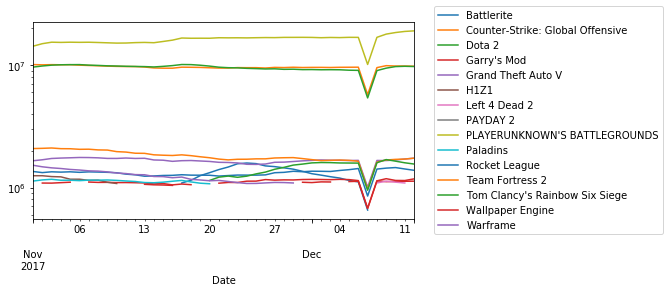

In [45]:
n = 10
plot_df = df.groupby(pd.TimeGrouper(freq='d'), group_keys=False).apply(lambda x: x.sort_values(by='players_2weeks', ascending=False).head(n))

# Pivot the data to get lines for each game and plot it
plot_df.reset_index().pivot_table(index='Date', columns='name', values='players_2weeks').plot()
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.yscale('log')
plt.tight_layout()
plt.show()

In [87]:
new_games = set(df.loc[df.index.max()]['name'].values).difference(df.loc[df.index.min()]['name'].values)
list(new_games)[:10]

['On the front line',
 'Akuatica',
 'Professor Teaches Excel 2016',
 'Golf Pro VR',
 'Touch My Spinner',
 'Mobile Empire',
 'Operation Apex',
 'Sociable Soccer',
 'Planet Stronghold: Colonial Defense',
 'Dogfight Elite']

In [88]:
df.columns

Index(['appid', 'average_2weeks', 'average_forever', 'ccu', 'developer',
       'median_2weeks', 'median_forever', 'name', 'negative', 'owners',
       'owners_variance', 'players_2weeks', 'players_2weeks_variance',
       'players_forever', 'players_forever_variance', 'positive', 'price',
       'publisher', 'score_rank', 'tags', 'userscore'],
      dtype='object')

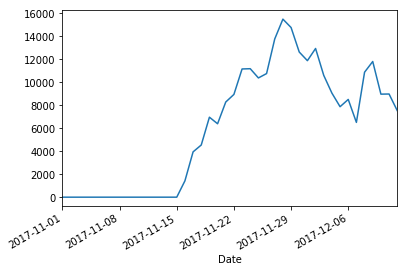

In [85]:
df[df['name']=="LEGO Marvel Super Heroes 2"]['players_2weeks'].plot()
plt.show()

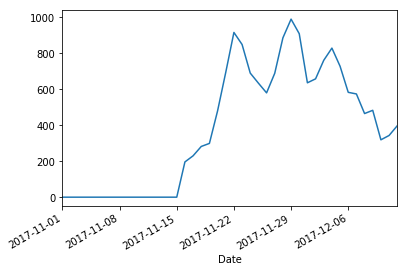

In [89]:
df[df['name']=="LEGO Marvel Super Heroes 2"]['average_2weeks'].plot()
plt.show()

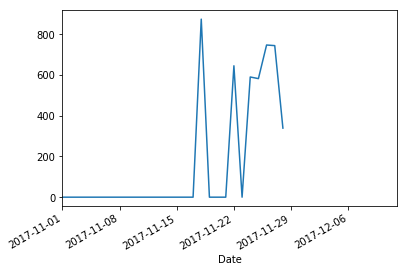

In [91]:
df[df['name']=="LEGO Marvel Super Heroes 2"]['ccu'].plot()
plt.show()

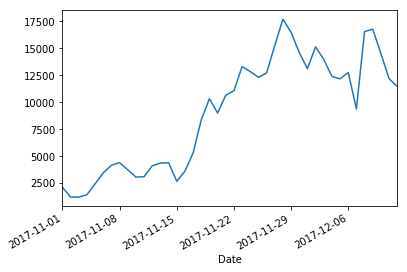

In [93]:
df[df['name']=="LEGO Marvel Super Heroes 2"]['owners'].plot()
plt.show()

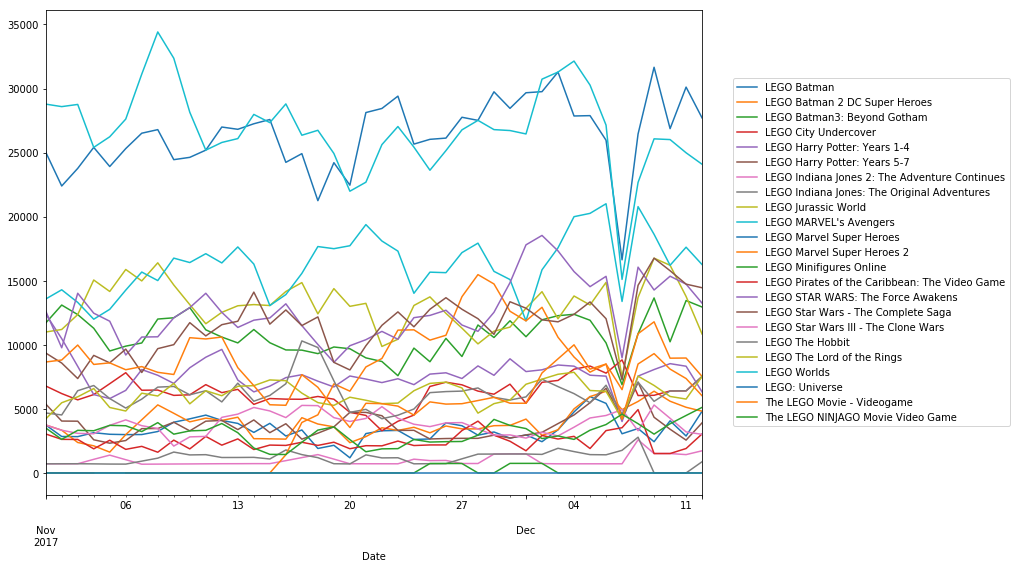

In [105]:
df[df['name'].str.contains('LEGO')].reset_index().pivot(index='Date', columns='name', values='players_2weeks').plot(figsize=(10,8))
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.tight_layout()
plt.show()